In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split ,RandomizedSearchCV , GridSearchCV
from sklearn import tree , datasets, metrics
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

In [2]:
def classifyTree(X_train,Y_train,X_val,Y_val):
    
    print("######################### Decision Tree ###################################")
    #tuning 
    test_tree=tree.DecisionTreeClassifier()
    
    param_grid = {'max_features': [None, 'sqrt', 'log2'],
              'max_depth' : list(range(10,15)),
              'criterion' :['gini', 'entropy']
             }
    
    classifing_tree = GridSearchCV(test_tree,param_grid,cv=2)
    classifing_tree = classifing_tree.fit(X_train,Y_train)
    print("Best Estimator Selected : " , classifing_tree.best_estimator_ )
    
    #predicting on the best model 
    Y_predicted = classifing_tree.best_estimator_.predict(X_val)
    F1_Score = metrics.f1_score(Y_val, Y_predicted , average = 'macro')
    print ("F1-Score = ",  F1_Score )
    print('\n')
    print("Classification report : ")
    print(metrics.classification_report(Y_val , Y_predicted))
    
    print("Confusion matrix :")
    metrics.ConfusionMatrixDisplay.from_predictions(Y_val , Y_predicted)
    plt.show()
    
    
    return  F1_Score ,classifing_tree.best_estimator_ 
    
    

In [3]:
def classifySVC(X_train,Y_train,X_val,Y_val):
 
    print("######################### Support Vector Classification ###################################")
    #tunning 
    param_grid = {'gamma': [1,0.1,0.01,0.001],
                  'kernel': ['rbf', 'poly', 'sigmoid']}  
    
    classifing_SVC = RandomizedSearchCV(SVC(),param_grid , cv=2)
    classifing_SVC =  classifing_SVC.fit(X_train,Y_train)
    
    print("Best Estimator Selected : " , classifing_SVC.best_estimator_ )
    
    #predicting on best model 
    Y_predicted = classifing_SVC.best_estimator_.predict(X_val)
    F1_Score = metrics.f1_score(Y_val, Y_predicted , average = 'macro')
    print ("F1-Score = ",  F1_Score )
    print('\n')

    print("Classification report : ")
    print(metrics.classification_report(Y_val , Y_predicted))
    
    print("Confusion matrix :")
    metrics.ConfusionMatrixDisplay.from_predictions(Y_val , Y_predicted)
    plt.show()
    
    return  F1_Score ,classifing_SVC.best_estimator_ 
    

In [4]:
def classifySGD(X_train,Y_train,X_val,Y_val):
 
    print("######################### Stochastic Gradient Descent ###################################")
    param_grid = {
         'loss': ['hinge', 'log', 'squared_hinge', 'modified_huber', 'perceptron'],
         'alpha': [0.0001, 0.001, 0.01, 0.1],
         'penalty': ['l2', 'l1', 'elasticnet', 'none'],
}  
    SGD = SGDClassifier()
    classifing_SGD = RandomizedSearchCV(SGD,param_grid , cv=2)
    classifing_SGD =  classifing_SGD.fit(X_train,Y_train)
   
    print("Best Estimator Selected : " , classifing_SGD.best_estimator_ )
    
    Y_predicted = classifing_SGD.best_estimator_.predict(X_val)
    F1_Score = metrics.f1_score(Y_val, Y_predicted , average = 'macro')
    print ("F1-Score = ",  F1_Score )
    print('\n')
    
    print("Classification report : ")
    print(metrics.classification_report(Y_val , Y_predicted))
    
    print("Confusion matrix :")
    metrics.ConfusionMatrixDisplay.from_predictions(Y_val , Y_predicted)
    plt.show()
    
    
    return  F1_Score ,classifing_SGD.best_estimator_ 

In [5]:
def testing_selected_model(classifier,X_test,Y_test) :
    Y_tested=classifier.predict(X_test)
    F1_Score = metrics.f1_score(Y_test, Y_tested , average = 'macro')
    
    print("Testing F1 Score = ",F1_Score)

######################### Decision Tree ###################################
Best Estimator Selected :  DecisionTreeClassifier(max_depth=12)
F1-Score =  0.6650007296909161


Classification report : 
              precision    recall  f1-score   support

           0       0.81      0.78      0.80      2126
           1       0.86      0.87      0.87      2338
           2       0.69      0.62      0.65      2136
           3       0.75      0.84      0.79     10647
           4       0.70      0.66      0.68      2062
           5       0.62      0.48      0.54      1862
           6       0.74      0.67      0.70      2117
           7       0.66      0.65      0.66      2138
           8       0.16      0.11      0.13       216
           9       0.65      0.60      0.62      2111
          10       0.86      0.89      0.88      2093

    accuracy                           0.74     29846
   macro avg       0.68      0.65      0.67     29846
weighted avg       0.74      0.74      0.74 

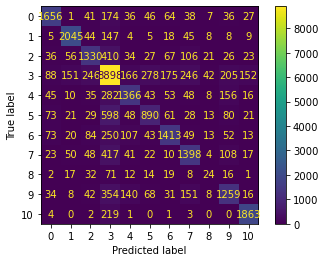

######################### Support Vector Classification ###################################
Best Estimator Selected :  SVC(gamma=0.01, kernel='poly')
F1-Score =  0.889190463346575


Classification report : 
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      2126
           1       0.94      0.98      0.96      2338
           2       0.92      0.87      0.89      2136
           3       0.92      0.94      0.93     10647
           4       0.92      0.89      0.90      2062
           5       0.92      0.84      0.88      1862
           6       0.95      0.94      0.95      2117
           7       0.91      0.90      0.90      2138
           8       0.83      0.49      0.62       216
           9       0.91      0.84      0.88      2111
          10       0.89      0.97      0.93      2093

    accuracy                           0.92     29846
   macro avg       0.91      0.87      0.89     29846
weighted avg       0.92      0.92  

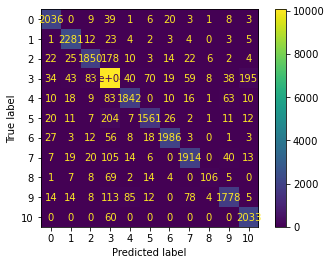

######################### Stochastic Gradient Descent ###################################


C:\Users\dahab\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\dahab\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\dahab\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\dahab\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\dahab\anaconda3\lib\site-packages\sklearn\linear_mo

Best Estimator Selected :  SGDClassifier(alpha=0.01, penalty='l1')
F1-Score =  0.7075391541741517


Classification report : 
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      2126
           1       0.87      0.86      0.87      2338
           2       0.77      0.70      0.73      2136
           3       0.70      0.78      0.73     10647
           4       0.75      0.69      0.72      2062
           5       0.59      0.56      0.57      1862
           6       0.83      0.80      0.82      2117
           7       0.77      0.73      0.75      2138
           8       0.42      0.25      0.31       216
           9       0.69      0.64      0.66      2111
          10       0.77      0.68      0.72      2093

    accuracy                           0.74     29846
   macro avg       0.73      0.69      0.71     29846
weighted avg       0.74      0.74      0.74     29846

Confusion matrix :


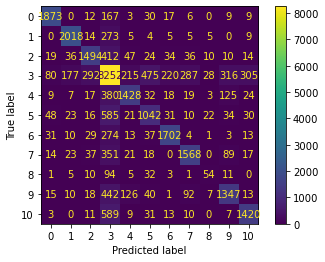

##########################################################################
The Best Model is the Support Vector Machine 
Testing F1 Score =  0.8938865190547379


In [6]:
#upload
x = np.load("MNIST-images.npy")
Y = np.load("MNIST-labels.npy")
X = x.reshape(x.shape[0], 576)


#print 
#normalize 
#pre-processing 


seed=129
X_train, X_val_test, Y_train, Y_val_test = train_test_split(X,Y,test_size = 0.7,
                                                            train_size = 0.3 ,random_state =seed, shuffle = True)

X_val, X_test, Y_val, Y_test = train_test_split(X_val_test,Y_val_test,test_size = 0.5,
                                                              train_size = 0.5,random_state =seed, shuffle = True)

tree_f1_score,tree_classify = classifyTree(X_train,Y_train,X_val,Y_val)
SVC_f1_score , SVC_classify=classifySVC(X_train,Y_train,X_val,Y_val)
SGD_f1_score , SGD_classify = classifySGD(X_train,Y_train,X_val,Y_val)


# F1 score combines precision and recall into a single metric. USE it to evaluate 
#Micro average F1 score performs worse on imbalanced datasets than macro average F1 score. The reason for this is because micro F1 gives equal importance to each observation, whilst macro F1 gives each class equal importance.
print("##########################################################################")

maximum_score = max (tree_f1_score,SVC_f1_score,SGD_f1_score)

if maximum_score == tree_f1_score :
        print ("The Best Model is the Desicion Tree Classifier ")
        testing_selected_model(tree_classify,X_test,Y_test)
elif maximum_score == SGD_f1_score :
        print("The Best Model is the Stochastic Gradient Descent  ")
        testing_selected_model(SGD_classify,X_test,Y_test)
else :
        print ("The Best Model is the Support Vector Machine ")
        testing_selected_model(SVC_classify,X_test,Y_test)
                